In [1]:
!pip install xgboost
!pip install graphviz
!pip install supertree

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('train.csv',index_col='id')

In [4]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
y = data['class']
X = data.drop('class', axis=1)
features = list(X.columns)

In [6]:
targets = y == 'p'

In [7]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,u,w,t,g,NaN,d,u
3116941,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,NaN,w,t,z,NaN,d,a


In [9]:
# Convert to categorical or float32
float_features = ['cap-diameter', 'stem-height', 'stem-width']
cat_features = [f for f in features if f not in float_features]
for feature in features:
    if feature in cat_features:
        categories = sorted(list(set(data[feature].dropna())))
        dtype = pd.CategoricalDtype(categories=categories,
                                    ordered=False)
        print(f"{feature:30} {len(dtype.categories)}")
        X.loc[~X[feature].isin(categories), feature] = np.nan
    else:
        dtype = np.float32
    X[feature] = X[feature].astype(dtype)
y = y.astype(dtype='category')

cap-shape                      74
cap-surface                    83
cap-color                      78
does-bruise-or-bleed           26
gill-attachment                78
gill-spacing                   48
gill-color                     63
stem-root                      38
stem-surface                   60
stem-color                     59
veil-type                      22
veil-color                     24
has-ring                       23
ring-type                      40
spore-print-color              32
habitat                        52
season                         4


In [17]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, random_state=0)

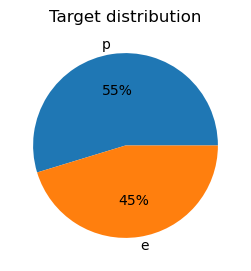

In [18]:
temp = y.value_counts()
temp

plt.figure(figsize=(6, 3))
plt.pie(temp, labels=temp.index, autopct="%.0f%%")
plt.title('Target distribution')
plt.show()

In [19]:
#import xgboost
from xgboost import XGBClassifier
model = XGBClassifier(enable_categorical=True)
#use k fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, targets, cv=5, scoring='accuracy')

In [20]:
print(scores)

[0.99191516 0.99187987 0.99188147 0.99161358 0.99205312]


In [22]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
#predict on y_test
y_pred = model.predict(X_test)
#get accuracy/f1
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"MCC: {mcc:.2f}")

Accuracy: 0.99
F1: 0.99
MCC: 0.98


In [27]:
from xgboost import plot_tree
import matplotlib



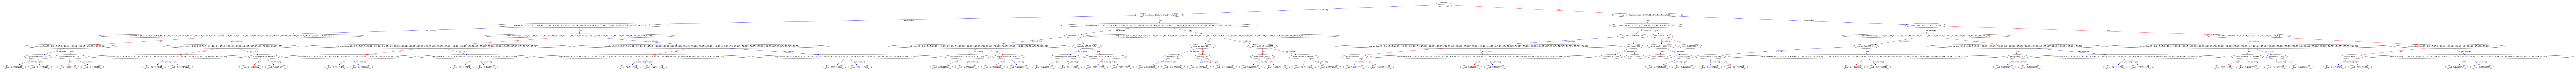

In [28]:
plot_tree(model, num_trees=4)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')